In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
plt.rcParams['figure.figsize'] = (14,4)

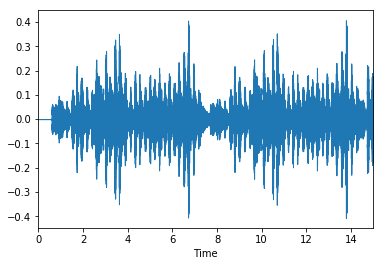

In [2]:
x, fs = librosa.load('Alla Turca Allegretto 2.wav')
#cut audio
cut_time = 15
x = x[:cut_time*fs]
librosa.display.waveplot(x, sr=fs)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html

In [3]:
IPython.display.Audio(x, rate=fs)


In [4]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5,1,'Log-frequency power spectrogram')

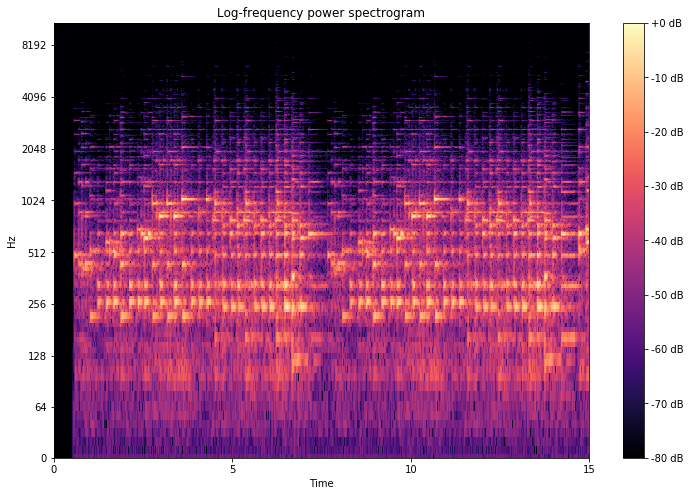

In [5]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

Text(0.5,1,'Linear-frequency power spectrogram')

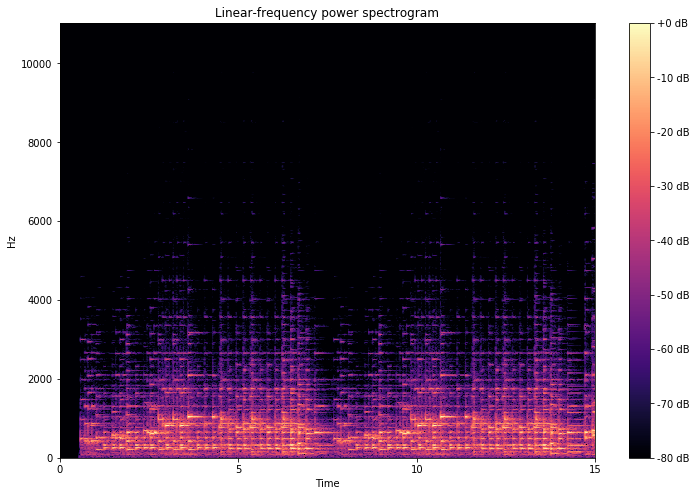

In [6]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [7]:
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc = 2048)
print mfccs.shape

(128, 646)


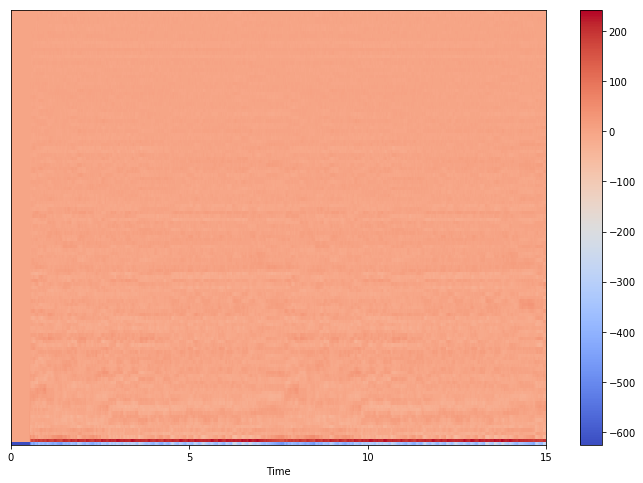

In [8]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [9]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
#print mfccs.mean(axis=1)
#print mfccs.var(axis=1)

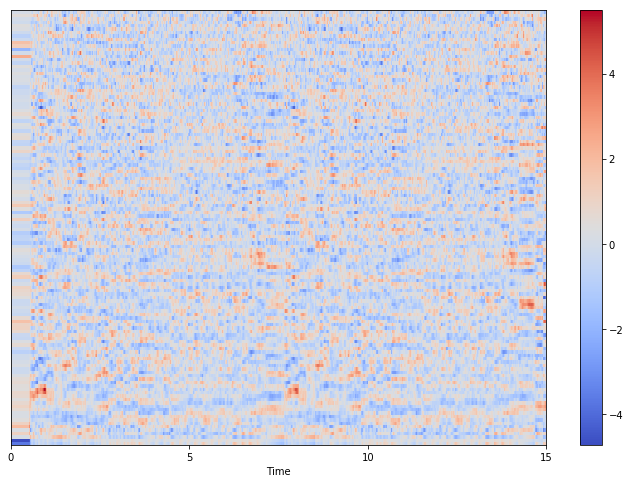

In [10]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [11]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape

(663, 13)


In [12]:
mfccs = sklearn.preprocessing.scale(mfccs)

/home/bqpd/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/bqpd/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


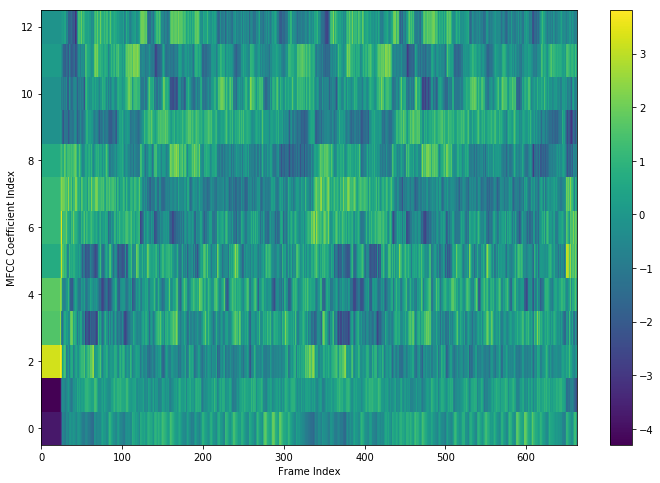

In [13]:
plt.figure(figsize=(12, 8))
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


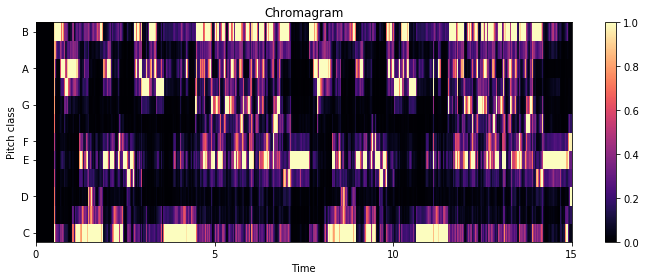

In [14]:
chroma = librosa.feature.chroma_stft(x, fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
print(chroma.transpose()[:20])

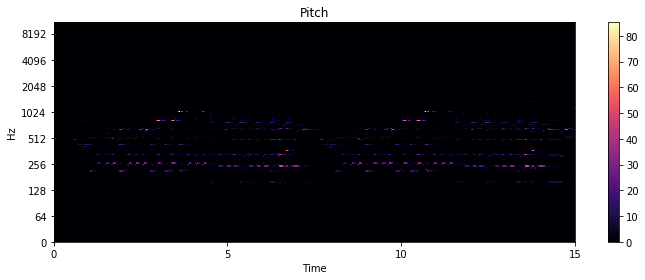

In [15]:
pitches, magnitudes = librosa.piptrack(x, fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(magnitudes, y_axis = 'log', x_axis='time')
plt.colorbar()
plt.title('Pitch')
plt.tight_layout()

In [16]:
tempo, beats = librosa.beat.beat_track(x, fs)#
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)
tempo
beats[:20]

/home/bqpd/anaconda2/lib/python2.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


array([  9,  27,  46,  66,  83, 102, 121, 139, 157, 177, 196, 215, 233,
       253, 271, 290, 310, 330, 350, 370])

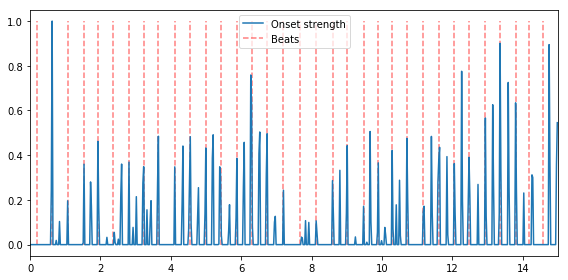

In [17]:
import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a window
plt.xlim(0, cut_time)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

12
646
646
12
2.8864017281144947


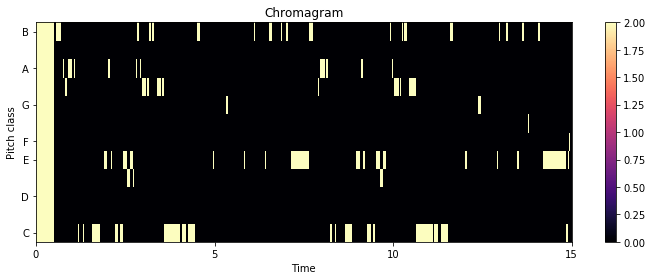

In [18]:
chroma = librosa.feature.chroma_stft(x, fs)
threshold = 300
m, n = chroma.shape
print m
print n

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape
print m
print n

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg

print(threshold)
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 2
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

12
646
646
12
2.8864017281144947


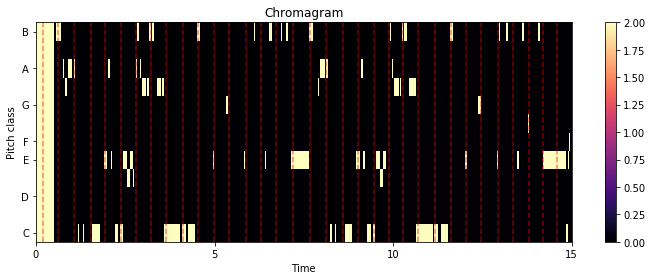

In [19]:
#beat synchronous
tempo, beats = librosa.beat.beat_track(x, fs)#
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)


chroma = librosa.feature.chroma_stft(x, fs)
threshold = 300
m, n = chroma.shape
print m
print n

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape
print m
print n

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 

print(threshold)
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 2
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

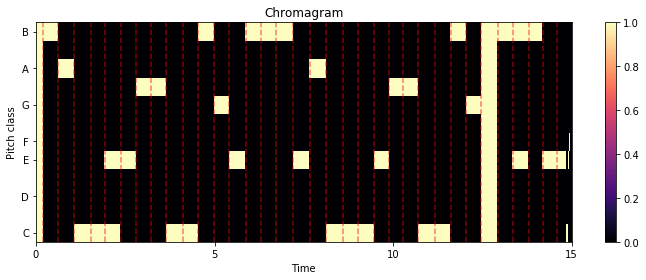

In [20]:
#beat synchronous
tempo, beats = librosa.beat.beat_track(x, fs)#
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)


chroma = librosa.feature.chroma_stft(x, fs)
chroma = chroma.transpose()
m, n = chroma.shape
avg = 0

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 1
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        

prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

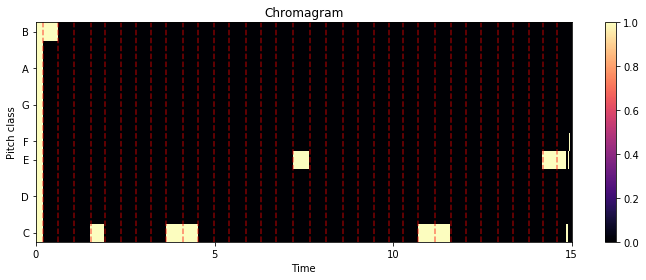

In [21]:
#beat synchronous
tempo, beats = librosa.beat.beat_track(x, fs)#
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)


chroma = librosa.feature.chroma_stft(x, fs)
chroma = chroma.transpose()
m, n = chroma.shape
avg = 0

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 1
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        

prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    
    max_count = np.where(sum_key == np.max(sum_key))
    if(sum_key[max_count][0] > ((act_beat - prev_beat) / 2)):
        #print(sum_key[max_count])
        fill[ind] = 1
        
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()